## Name: Deepanshu Mittal
## Roll No: MDS202320

IMPORT RELEVANT LIBRARIES

In [151]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

LOAD THE DATASETS
- Train.csv
- Validation.csv
- Test.csv

In [152]:
train_data=pd.read_csv("train.csv")
validate_data=pd.read_csv("validation.csv")
test_data=pd.read_csv("test.csv")

PREPARE ATTRIBUTES AND LABELS FOR TRAINING

In [154]:
X_train, y_train = train_data["clean_message"], train_data["label"]
X_validate, y_validate = validate_data["clean_message"], validate_data["label"]
X_test, y_test = test_data["clean_message"], test_data["label"]

In [155]:
X_train.shape,X_validate.shape,X_test.shape

((3616,), (775,), (776,))

MODEL FITTING

Model used:

- Support Vector Machine
- Logistic Regression
- Random Forest

MODEL TRAINING AND EVALUATION WITHOUT HYPER PARAMETER TUNING

Training and evaluating SVM...


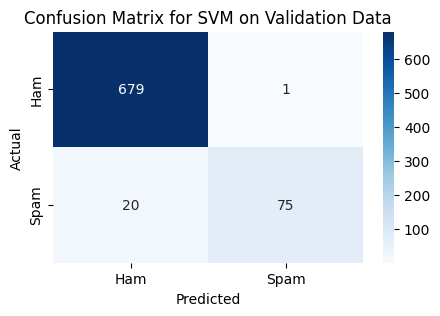

Training and evaluating Logistic Regression...


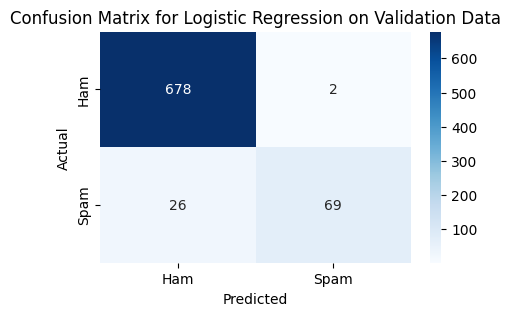

Training and evaluating Random Forest...


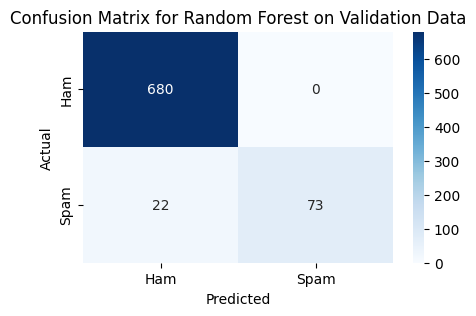

Training Data Results:
                    Accuracy Precision  Recall F1 Score CV Score
SVM                   99.72%   100.00%  97.76%   98.87%   99.17%
Logistic Regression   96.46%    99.69%  71.59%   83.33%   99.29%
Random Forest         99.97%   100.00%  99.78%   99.89%  100.00%


Validation Data Results:
                    Accuracy Precision  Recall F1 Score CV Score
SVM                   97.29%    98.68%  78.95%   87.72%   99.17%
Logistic Regression   96.39%    97.18%  72.63%   83.13%   99.29%
Random Forest         97.16%   100.00%  76.84%   86.90%   99.67%


In [156]:
# Define a function to create pipelines for each model
def create_pipeline(model):
    return Pipeline([ 
        ('tfidf', TfidfVectorizer()),  # TF-IDF Vectorization
        ('classifier', model)          # Classifier (can be SVM, Logistic Regression, Random Forest)
    ])

# Choose your models
models = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

# Initialize DataFrames to store results for both train and validation
df_train = pd.DataFrame(np.zeros((3, 5))) 
df_train.index = ["SVM", "Logistic Regression", "Random Forest"]
df_train.columns = ["Accuracy", "Precision", "Recall", "F1 Score", "CV Score"]

df_validate = pd.DataFrame(np.zeros((3, 5))) 
df_validate.index = ["SVM", "Logistic Regression", "Random Forest"]
df_validate.columns = ["Accuracy", "Precision", "Recall", "F1 Score", "CV Score"]

# Training and evaluation on both training and validation data
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")

    # Create pipeline with TF-IDF and the classifier
    pipeline = create_pipeline(model)

    # Train the model
    pipeline.fit(X_train, y_train)

    # --- Training Data Metrics ---
    y_pred_train = pipeline.predict(X_train)

    # Compute metrics for training data
    model_list = list(models.keys()) 
    model_index = model_list.index(model_name)  
    df_train.iloc[model_index, 0] = accuracy_score(y_train, y_pred_train) * 100
    df_train.iloc[model_index, 1] = precision_score(y_train, y_pred_train) * 100
    df_train.iloc[model_index, 2] = recall_score(y_train, y_pred_train) * 100
    df_train.iloc[model_index, 3] = f1_score(y_train, y_pred_train) * 100

    # Perform cross-validation score for training data
    cv_score_train = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='precision')
    df_train.iloc[model_index, 4] = cv_score_train.mean() * 100

    # --- Validation Data Metrics ---
    y_pred_validate = pipeline.predict(X_validate)

    # Compute metrics for validation data
    df_validate.iloc[model_index, 0] = accuracy_score(y_validate, y_pred_validate) * 100
    df_validate.iloc[model_index, 1] = precision_score(y_validate, y_pred_validate) * 100
    df_validate.iloc[model_index, 2] = recall_score(y_validate, y_pred_validate) * 100
    df_validate.iloc[model_index, 3] = f1_score(y_validate, y_pred_validate) * 100

    # Perform cross-validation score for validation data
    cv_score_validate = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='precision')
    df_validate.iloc[model_index, 4] = cv_score_validate.mean() * 100

    # Confusion matrix plot for validation data
    cm = confusion_matrix(y_validate, y_pred_validate)
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
    plt.title(f"Confusion Matrix for {model_name} on Validation Data")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Display the results for training data as percentages for each metric
df_train_display = df_train.map(lambda x: f"{x:.2f}%")
print("Training Data Results:")
print(df_train_display)

# Display the results for validation data as percentages for each metric
df_validate_display = df_validate.map(lambda x: f"{x:.2f}%")
print("\n")
print("Validation Data Results:")
print(df_validate_display)


MODEL TRAINING AND EVALUATION WITH HYPER PARAMETER TUNING


Training and hyperparameter tuning SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters for SVM: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}


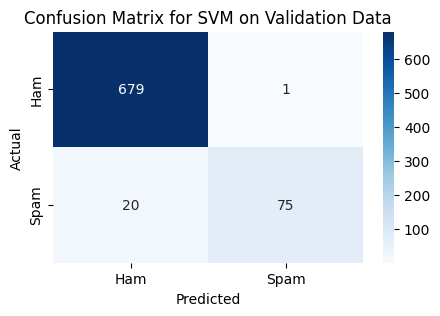

Training and hyperparameter tuning Logistic Regression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best hyperparameters for Logistic Regression: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


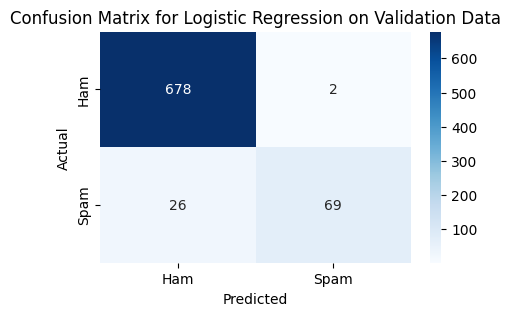

Training and hyperparameter tuning Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters for Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}


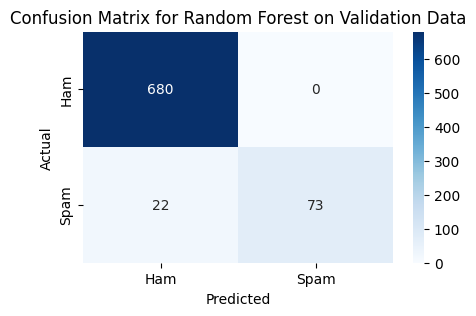

Training Data Results:
                    Accuracy Precision   Recall F1 Score CV Score
SVM                   99.72%   100.00%   97.76%   98.87%   99.17%
Logistic Regression   96.43%    99.69%   71.36%   83.18%   99.29%
Random Forest        100.00%   100.00%  100.00%  100.00%  100.00%
Validation Data Results:
                    Accuracy Precision  Recall F1 Score CV Score
SVM                   97.29%    98.68%  78.95%   87.72%   99.17%
Logistic Regression   96.39%    97.18%  72.63%   83.13%   99.29%
Random Forest         97.16%   100.00%  76.84%   86.90%  100.00%


Best Models: 

{'SVM': Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', SVC(C=1))]), 'Logistic Regression': Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', LogisticRegression(C=1, solver='liblinear'))]), 'Random Forest': Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=200))])}


In [157]:
# Define a function to create pipelines for each model
def create_pipeline(model):
    return Pipeline([ 
        ('tfidf', TfidfVectorizer()),  # TF-IDF Vectorization
        ('classifier', model)          # Classifier (can be SVM, Logistic Regression, Random Forest)
    ])

# Define hyperparameters for grid search
param_grids = {
    'SVM': {
        'classifier__C': [0.1, 1, 10],  # Regularization strength
        'classifier__kernel': ['linear', 'rbf'],  # Type of kernel
        'classifier__gamma': ['scale', 'auto']  # Kernel coefficient
    },
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10],  # Regularization strength
        'classifier__penalty': ['l2'],  # Penalty type
        'classifier__solver': ['liblinear', 'saga']  # Solvers for optimization
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],  # Number of trees
        'classifier__max_depth': [None, 10, 20],  # Max depth of trees
        'classifier__min_samples_split': [2, 5],  # Min samples required to split a node
        'classifier__min_samples_leaf': [1, 2],  # Min samples required at a leaf node
    }
}

# Choose your models
models = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

# Initialize DataFrames to store results for both train and validation
df_train = pd.DataFrame(np.zeros((3, 5))) 
df_train.index = ["SVM", "Logistic Regression", "Random Forest"]
df_train.columns = ["Accuracy", "Precision", "Recall", "F1 Score", "CV Score"]

df_validate = pd.DataFrame(np.zeros((3, 5))) 
df_validate.index = ["SVM", "Logistic Regression", "Random Forest"]
df_validate.columns = ["Accuracy", "Precision", "Recall", "F1 Score", "CV Score"]

# Dictionary to store the best models
best_models = {}

# Hyperparameter tuning and evaluation on both training and validation data
for model_name, model in models.items():
    print(f"Training and hyperparameter tuning {model_name}...")

    # Create pipeline with TF-IDF and the classifier
    pipeline = create_pipeline(model)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(
        pipeline, param_grid=param_grids[model_name], cv=5, n_jobs=-1, verbose=1, scoring='precision'
    )

    # Train the model and perform hyperparameter tuning
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and the best model
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model
    print(f"Best hyperparameters for {model_name}: {grid_search.best_params_}")

    # --- Training Data Metrics ---
    y_pred_train = best_model.predict(X_train)

    # Compute metrics for training data
    model_list = list(models.keys()) 
    model_index = model_list.index(model_name) 
    df_train.iloc[model_index, 0] = accuracy_score(y_train, y_pred_train) * 100
    df_train.iloc[model_index, 1] = precision_score(y_train, y_pred_train) * 100
    df_train.iloc[model_index, 2] = recall_score(y_train, y_pred_train) * 100
    df_train.iloc[model_index, 3] = f1_score(y_train, y_pred_train) * 100

    # Perform cross-validation score for training data
    cv_score_train = cross_val_score(best_model, X_train, y_train, cv=5, scoring='precision')
    df_train.iloc[model_index, 4] = cv_score_train.mean() * 100 

    # --- Validation Data Metrics ---
    y_pred_validate = best_model.predict(X_validate)

    # Compute metrics for validation data
    df_validate.iloc[model_index, 0] = accuracy_score(y_validate, y_pred_validate) * 100
    df_validate.iloc[model_index, 1] = precision_score(y_validate, y_pred_validate) * 100
    df_validate.iloc[model_index, 2] = recall_score(y_validate, y_pred_validate) * 100
    df_validate.iloc[model_index, 3] = f1_score(y_validate, y_pred_validate) * 100

    # Perform cross-validation score for validation data
    cv_score_validate = cross_val_score(best_model, X_train, y_train, cv=5, scoring='precision')
    df_validate.iloc[model_index, 4] = cv_score_validate.mean() * 100  

    # Confusion matrix plot for validation data
    cm = confusion_matrix(y_validate, y_pred_validate)
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
    plt.title(f"Confusion Matrix for {model_name} on Validation Data")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Display the results for training data as percentages for each metric
df_train_display = df_train.map(lambda x: f"{x:.2f}%")
print("Training Data Results:")
print(df_train_display)

# Display the results for validation data as percentages for each metric
df_validate_display = df_validate.map(lambda x: f"{x:.2f}%")
print("Validation Data Results:")
print(df_validate_display)

print("\n")
print("Best Models: \n")
print(best_models)

EVALUATE MODEL ON THE TEST DATASET

In [159]:
# Evaluate the best models on the test data
df_test = pd.DataFrame(np.zeros((3, 5))) 
df_test.index = ["SVM", "Logistic Regression", "Random Forest"]
df_test.columns = ["Accuracy", "Precision", "Recall", "F1 Score", "CV Score"]

for model_name, _ in models.items():
    print(f"Evaluating {model_name} on Test Data...")

    best_model = best_models[model_name]

    y_pred_test = best_model.predict(X_test)

    # Compute metrics
    model_list = list(models.keys()) 
    model_index = model_list.index(model_name)  #
    df_test.iloc[model_index, 0] = accuracy_score(y_test, y_pred_test) * 100
    df_test.iloc[model_index, 1] = precision_score(y_test, y_pred_test) * 100
    df_test.iloc[model_index, 2] = recall_score(y_test, y_pred_test) * 100
    df_test.iloc[model_index, 3] = f1_score(y_test, y_pred_test) * 100

    # Perform cross-validation score
    cv_score = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
    df_test.iloc[model_index, 4] = cv_score.mean() * 100 

# Display the results as percentages for each metric
df_display = df_test.map(lambda x: f"{x:.2f}%")
print("Test Data Results:")
print(df_display)



Evaluating SVM on Test Data...
Evaluating Logistic Regression on Test Data...
Evaluating Random Forest on Test Data...
Test Data Results:
                    Accuracy Precision  Recall F1 Score CV Score
SVM                   97.94%   100.00%  85.59%   92.23%   97.40%
Logistic Regression   95.88%    98.77%  72.07%   83.33%   95.35%
Random Forest         96.39%   100.00%  74.77%   85.57%   96.60%


CONCLUSION

We have done extensive hyperparamater tuning on three models `(SVM, Logistic Regression and Random Forest)`. Since it a binary classification problem and the data is highly imbalanced. Metrices like `Precision`, `Recall` and `F1 Score` are more relavant here.

In task like spam classification, predicting a Ham message as Spam is a more severe mistake. That means we should focus more on reducing `False positives` which means more focus on `Precision`.

Keeping that in mind as per the `validation data` and `test data` evaluation:

`SVM` and `Random Forest` have very similar performance and logistic regression is lacking behind.

`Random Forest` has 100% precision on both validation and test dataset. So our choice should be Random Forest. But if have to keep a balance between precision and recall than mertic like F1 score is good, if we go in that tangent, `SVM` has a better F1 Score in both test and validation dataset. 